## Multi-Class Classification using Perceptron Algorithm

In [76]:
import pandas as pd
import numpy as np

Load the data

In [40]:
df = pd.read_csv("BazarVoice.csv", header = 0, engine = 'python')

In [41]:
test_df = pd.read_csv('Clean_BW2.csv', header = 0, engine = 'python')
test_df = test_df[['brand','date','full_text','sentiment','page_type','Clean_text']]

Structure of data

In [42]:
df.head()

,lastmodificationtime,title,reviewtext,wordcloudtext,rating,reviewerlocation,countrycode,productname,categoryname
0,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,US,LISTERINEÂ® SMART RINSEÂ® Kids Anticavity Fluo...,Listerine Smart Rinse Kids Mouthwash Collection
1,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,US,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,Listerine ZERO alcohol-free Mouthwash Collection
2,6/26/2020,*** Mouth Sloughing !!! ***,"If you want to LIVE an actual NIGHTMARE, use t...",WANT,1,Syracuse,US,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,Listerine ZERO alcohol-free Mouthwash Collection
3,6/26/2020,It works,Love this product it does what it's supposed t...,LOVE,5,Columbus,US,LISTERINEÂ® READY! TABSâ?¢ Chewable Tablets So...,Listerine On-The-Go Oral Care Products
4,6/26/2020,Zero option no good at all,"I got the original, the green one the blue min...",GOT,1,Hialeah,US,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,Listerine ZERO alcohol-free Mouthwash Collection


In [43]:
test_df.head()

,brand,date,full_text,sentiment,page_type,Clean_text
0,Listerine,12/30/2018,RT @KevGBKNY I think that?s out your system 2-...,neutral,twitter,think system days day use lot listerine peroxide
1,Listerine,12/30/2018,"I love these strips, but have had trouble find...",positive,review,love strips trouble finding area please tell s...
2,Listerine,12/30/2018,"I brush my teeth with walmart brand listerine,...",neutral,forum,brush teeth walmart brand listerine ok
3,Listerine,12/30/2018,RT @chaddukes Sometimes when I watch the Redsk...,neutral,twitter,sometimes watch redskins play football like ro...
4,Listerine,12/30/2018,Jawn be gettin off work tryna meet up / jawn b...,neutral,twitter,jawn gettin work tryna meet jawn b gettin outt...


In [44]:
df.shape

(8591, 9)

In [45]:
test_df.shape

(240338, 6)

Selecting columns of interest

In [46]:
col = ['title','categoryname']
df= df[col]
df= df[pd.notnull(df['title'])]

In [47]:
df.columns=['title','categoryname']

df.head()

,title,categoryname
0,Great product,Listerine Smart Rinse Kids Mouthwash Collection
1,Oral Tissue Sloughing-- A Serious Concern,Listerine ZERO alcohol-free Mouthwash Collection
2,*** Mouth Sloughing !!! ***,Listerine ZERO alcohol-free Mouthwash Collection
3,It works,Listerine On-The-Go Oral Care Products
4,Zero option no good at all,Listerine ZERO alcohol-free Mouthwash Collection


Factorizing product category to simplify making the dictionary

In [48]:
df['category_id'] = df['categoryname'].factorize()[0]

df.head()

,title,categoryname,category_id
0,Great product,Listerine Smart Rinse Kids Mouthwash Collection,0
1,Oral Tissue Sloughing-- A Serious Concern,Listerine ZERO alcohol-free Mouthwash Collection,1
2,*** Mouth Sloughing !!! ***,Listerine ZERO alcohol-free Mouthwash Collection,1
3,It works,Listerine On-The-Go Oral Care Products,2
4,Zero option no good at all,Listerine ZERO alcohol-free Mouthwash Collection,1


In [49]:
cat_id_df = df[["categoryname", "category_id"]].drop_duplicates().sort_values('category_id')


cat_id_df

,categoryname,category_id
0,Listerine Smart Rinse Kids Mouthwash Collection,0
1,Listerine ZERO alcohol-free Mouthwash Collection,1
3,Listerine On-The-Go Oral Care Products,2
8,Listerine Antiseptic Mouthwash Collection,3
9,Listerine Floss Products,4
14,Listerine NIGHTLY RESET,5
16,Listerine SENSITIVITY,6
18,Listerine NATURALS Mouthwash Collection,7
25,Listerine UltraClean Tartar Control Mouthwash ...,8
28,Listerine Healthy White Teeth Whitening Mouthw...,9


In [50]:
cat_to_id = dict(cat_id_df.values)

cat_to_id


{'Listerine Smart Rinse Kids Mouthwash Collection': 0,
 'Listerine ZERO alcohol-free Mouthwash Collection': 1,
 'Listerine On-The-Go Oral Care Products': 2,
 'Listerine Antiseptic Mouthwash Collection': 3,
 'Listerine Floss Products': 4,
 'Listerine NIGHTLY RESET': 5,
 'Listerine SENSITIVITY': 6,
 'Listerine NATURALS Mouthwash Collection': 7,
 'Listerine UltraClean Tartar Control Mouthwash Collection': 8,
 'Listerine Healthy White Teeth Whitening Mouthwash Collection': 9,
 'Listerine Total Care Mouthwash Collection': 10,
 'Listerine Fluoride Toothpaste Collection': 11,
 'Listerine Fluoride Defense': 12}

In [51]:
id_to_cat = dict(cat_id_df[['category_id','categoryname']].values)

id_to_cat

{0: 'Listerine Smart Rinse Kids Mouthwash Collection',
 1: 'Listerine ZERO alcohol-free Mouthwash Collection',
 2: 'Listerine On-The-Go Oral Care Products',
 3: 'Listerine Antiseptic Mouthwash Collection',
 4: 'Listerine Floss Products',
 5: 'Listerine NIGHTLY RESET',
 6: 'Listerine SENSITIVITY',
 7: 'Listerine NATURALS Mouthwash Collection',
 8: 'Listerine UltraClean Tartar Control Mouthwash Collection',
 9: 'Listerine Healthy White Teeth Whitening Mouthwash Collection',
 10: 'Listerine Total Care Mouthwash Collection',
 11: 'Listerine Fluoride Toothpaste Collection',
 12: 'Listerine Fluoride Defense'}

Visualizing category frequencies

In [52]:
import matplotlib.pyplot as plt

In [53]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

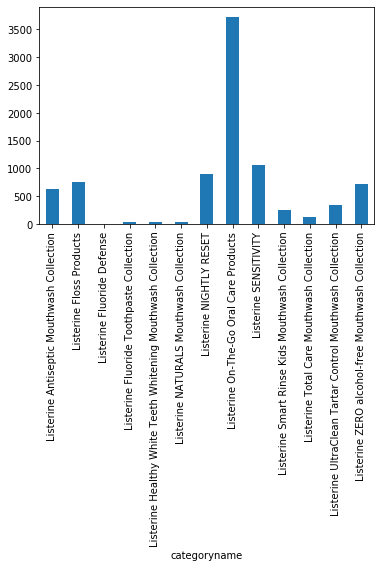

In [55]:
df.groupby('categoryname').title.count().plot.bar(ylim=0)

Creating tfidf

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features



In [58]:
features = tfidf.fit_transform(df.title).toarray()

In [59]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
labels = df.category_id
features.shape

labels

0        0
1        1
2        1
3        2
4        1
        ..
8586    10
8587     4
8588     2
8589     2
8590     3
Name: category_id, Length: 8591, dtype: int64

Splitting the data into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
test_df.head()

,brand,date,full_text,sentiment,page_type,Clean_text
0,Listerine,12/30/2018,RT @KevGBKNY I think that?s out your system 2-...,neutral,twitter,think system days day use lot listerine peroxide
1,Listerine,12/30/2018,"I love these strips, but have had trouble find...",positive,review,love strips trouble finding area please tell s...
2,Listerine,12/30/2018,"I brush my teeth with walmart brand listerine,...",neutral,forum,brush teeth walmart brand listerine ok
3,Listerine,12/30/2018,RT @chaddukes Sometimes when I watch the Redsk...,neutral,twitter,sometimes watch redskins play football like ro...
4,Listerine,12/30/2018,Jawn be gettin off work tryna meet up / jawn b...,neutral,twitter,jawn gettin work tryna meet jawn b gettin outt...


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['categoryname'], random_state= 0)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [67]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [68]:
y_pred = clf.predict(count_vect.transform(X_test))
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred, labels= df.categoryname, target_names=df['categoryname'].unique()))

C:\Users\ravib\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1989: UserWarning: labels size, 8591, does not match size of target_names, 13
  .format(len(labels), len(target_names))
C:\Users\ravib\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

             Listerine Smart Rinse Kids Mouthwash Collection       0.67      0.48      0.56        61
            Listerine ZERO alcohol-free Mouthwash Collection       0.49      0.39      0.43       183
                      Listerine On-The-Go Oral Care Products       0.49      0.39      0.43       183
                   Listerine Antiseptic Mouthwash Collection       0.72      0.83      0.77       946
                                    Listerine Floss Products       0.49      0.39      0.43       183
                                     Listerine NIGHTLY RESET       0.49      0.39      0.43       183
                                       Listerine SENSITIVITY       0.49      0.39      0.43       183
                     Listerine NATURALS Mouthwash Collection       0.49      0.39      0.43       183
    Listerine UltraClean Tartar Control Mouthwash Collection       0.41      0.31

Running on test data

In [69]:
X_test = train_test_split(test_df['Clean_text'])

Building the model using perceptron algorithm

In [70]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

Applying the model on brandwatch dataset for classifying

In [71]:
prediction = []
for ind in test_df.index:
    pred=clf.predict(count_vect.transform([test_df['Clean_text'][ind]]))
    prediction.append(pred[0])
    

In [72]:
prediction

['Listerine NIGHTLY RESET',
 'Listerine Floss Products',
 'Listerine SENSITIVITY',
 'Listerine On-The-Go Oral Care Products',
 'Listerine NIGHTLY RESET',
 'Listerine NIGHTLY RESET',
 'Listerine On-The-Go Oral Care Products',
 'Listerine SENSITIVITY',
 'Listerine Smart Rinse Kids Mouthwash Collection',
 'Listerine NIGHTLY RESET',
 'Listerine Smart Rinse Kids Mouthwash Collection',
 'Listerine On-The-Go Oral Care Products',
 'Listerine UltraClean Tartar Control Mouthwash Collection',
 'Listerine On-The-Go Oral Care Products',
 'Listerine On-The-Go Oral Care Products',
 'Listerine On-The-Go Oral Care Products',
 'Listerine SENSITIVITY',
 'Listerine NIGHTLY RESET',
 'Listerine SENSITIVITY',
 'Listerine Antiseptic Mouthwash Collection',
 'Listerine On-The-Go Oral Care Products',
 'Listerine Antiseptic Mouthwash Collection',
 'Listerine Antiseptic Mouthwash Collection',
 'Listerine SENSITIVITY',
 'Listerine SENSITIVITY',
 'Listerine Floss Products',
 'Listerine Antiseptic Mouthwash Collectio

In [73]:
predict_df = pd.DataFrame(data={"col1": prediction})
predict_df

,col1
0,Listerine NIGHTLY RESET
1,Listerine Floss Products
2,Listerine SENSITIVITY
3,Listerine On-The-Go Oral Care Products
4,Listerine NIGHTLY RESET
...,...
240333,Listerine On-The-Go Oral Care Products
240334,Listerine Floss Products
240335,Listerine Floss Products
240336,Listerine Fluoride Toothpaste Collection


In [74]:
test_df['Product_category'] = predict_df
test_df

,brand,date,full_text,sentiment,page_type,Clean_text,Product_category
0,Listerine,12/30/2018,RT @KevGBKNY I think that?s out your system 2-...,neutral,twitter,think system days day use lot listerine peroxide,Listerine NIGHTLY RESET
1,Listerine,12/30/2018,"I love these strips, but have had trouble find...",positive,review,love strips trouble finding area please tell s...,Listerine Floss Products
2,Listerine,12/30/2018,"I brush my teeth with walmart brand listerine,...",neutral,forum,brush teeth walmart brand listerine ok,Listerine SENSITIVITY
3,Listerine,12/30/2018,RT @chaddukes Sometimes when I watch the Redsk...,neutral,twitter,sometimes watch redskins play football like ro...,Listerine On-The-Go Oral Care Products
4,Listerine,12/30/2018,Jawn be gettin off work tryna meet up / jawn b...,neutral,twitter,jawn gettin work tryna meet jawn b gettin outt...,Listerine NIGHTLY RESET
...,...,...,...,...,...,...,...
240333,Philips,1/1/2020,Philips Sonicare Charger with UV Sanitizer Mod...,neutral,twitter,philips sonicare charger uv sanitizer model hx,Listerine On-The-Go Oral Care Products
240334,Philips,1/1/2020,BrightDeal Replacement Toothbrush Heads compat...,neutral,twitter,brightdeal replacement toothbrush heads compat...,Listerine Floss Products
240335,Philips,1/1/2020,Vochigh Replacement Brush Heads Compatible wit...,neutral,twitter,vochigh replacement brush heads compatible phi...,Listerine Floss Products
240336,Parodontax,1/1/2020,This is my favorite tasting toothpaste. I just...,positive,review,favorite tasting toothpaste wish expensive cam...,Listerine Fluoride Toothpaste Collection


In [75]:
test_df.to_csv("D:/Qtr 4/Consulting project/Project/test_final.csv", sep=',',index=False)